In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import plotly_express as px
import seaborn as sns
sns.set(style='ticks')

In [2]:
OHCO = ['book_id', 'chap_id']
colors = "YlGnBu" 
# colors = "Spectral"

In [3]:
LIB = pd.read_csv('LIB.csv').set_index('book_id')
TFIDF = pd.read_csv('L2_normalized.csv').set_index(['book_id', 'chap_num'])
VOCAB = pd.read_csv('VSHORT_2.csv')

In [4]:
VOCAB

,Unnamed: 0,term_str,n,p,i,dfidf,porter_stem,max_pos,max_pos_group,stop
0,3781,fine,39,0.000082,13.570367,32.904590,fine,NN,NN,0
1,12272,worn,28,0.000059,14.048414,32.904590,worn,NN,NN,0
2,7022,nice,90,0.000190,12.363916,32.904590,nice,JJ,JJ,0
3,8514,remote,29,0.000061,13.997788,32.904590,remot,NN,NN,0
4,5261,horror,36,0.000076,13.685844,32.904590,horror,NN,NN,0
...,...,...,...,...,...,...,...,...,...,...
995,10119,steward,34,0.000072,13.768306,26.322682,steward,NN,NN,0
996,11623,vague,12,0.000025,15.270806,26.322682,vagu,NN,NN,0
997,1833,cloth,17,0.000036,14.768306,26.322682,cloth,NN,NN,0
998,9895,spirit,14,0.000030,15.048414,26.322682,spirit,NN,NN,0


In [5]:
LIB

,title,part,author,year_of_publish
book_id,,,,
1,The Lord of the Rings,The Fellowship of the Ring,J. R. R. Tolkien,21 October 1954
2,The Lord of the Rings,The Fellowship of the Ring,J. R. R. Tolkien,21 October 1954
3,The Lord of the Rings,The Two Towers,J. R. R. Tolkien,21 April 1955
4,The Lord of the Rings,The Two Towers,J. R. R. Tolkien,21 April 1955
5,The Lord of the Rings,The Return of the King,J. R. R. Tolkien,5 January 1956
6,The Lord of the Rings,The Return of the King,J. R. R. Tolkien,5 January 1956


In [6]:
TFIDF

fine      worn      nice    remote    horror      task  \
book_id chap_num                                                               
1       1         0.033588  0.011196  0.033588  0.011196  0.000000  0.000000   
        2         0.028008  0.014004  0.000000  0.014004  0.000000  0.014004   
        3         0.052164  0.000000  0.034776  0.000000  0.000000  0.017388   
        4         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        5         0.000000  0.000000  0.000000  0.000000  0.000000  0.026690   
...                    ...       ...       ...       ...       ...       ...   
6       5         0.000000  0.000000  0.000000  0.000000  0.000000  0.027027   
        6         0.064687  0.000000  0.021562  0.000000  0.000000  0.021562   
        7         0.034951  0.000000  0.000000  0.034951  0.000000  0.034951   
        8         0.041702  0.000000  0.041702  0.000000  0.013901  0.013901   
        9         0.064055  0.032027  0.000000  0.000000  0.000000  0.032027   

                      helm  understood     crack    pardon  ...     pride  \
book_id chap_num                                            ...             
1       1         0.000000    0.011196  0.000000  0.000000  ...  0.000000   
        2         0.000000    0.014004  0.000000  0.014004  ...  0.025766   
        3         0.000000    0.017388  0.017388  0.017388  ...  0.000000   
        4         0.000000    0.000000  0.000000  0.000000  ...  0.000000   
        5         0.000000    0.026690  0.026690  0.026690  ...  0.000000   
...                    ...         ...       ...       ...  ...       ...   
6       5         0.000000    0.027027  0.000000  0.000000  ...  0.000000   
        6         0.107812    0.000000  0.000000  0.000000  ...  0.000000   
        7         0.000000    0.034951  0.034951  0.034951  ...  0.000000   
        8         0.000000    0.013901  0.000000  0.027801  ...  0.000000   
        9         0.000000    0.032027  0.000000  0.000000  ...  0.000000   

                      bowl  leap     worry  likeness   steward     vague  \
book_id chap_num                                                           
1       1         0.000000   0.0  0.061799  0.000000  0.000000  0.000000   
        2         0.000000   0.0  0.051533  0.000000  0.000000  0.000000   
        3         0.000000   0.0  0.031993  0.000000  0.000000  0.000000   
        4         0.000000   0.0  0.000000  0.000000  0.000000  0.000000   
        5         0.000000   0.0  0.049108  0.000000  0.000000  0.049108   
...                    ...   ...       ...       ...       ...       ...   
6       5         0.000000   0.0  0.000000  0.024864  0.223772  0.000000   
        6         0.039673   0.0  0.000000  0.000000  0.039673  0.000000   
        7         0.000000   0.0  0.000000  0.000000  0.000000  0.000000   
        8         0.000000   0.0  0.025576  0.000000  0.000000  0.000000   
        9         0.000000   0.0  0.000000  0.000000  0.000000  0.058928   

                  cloth    spirit    darkly  
book_id chap_num                             
1       1           0.0  0.000000  0.000000  
        2           0.0  0.025766  0.000000  
        3           0.0  0.000000  0.000000  
        4           0.0  0.000000  0.000000  
        5           0.0  0.000000  0.000000  
...                 ...       ...       ...  
6       5           0.0  0.000000  0.000000  
        6           0.0  0.000000  0.000000  
        7           0.0  0.000000  0.000000  
        8           0.0  0.025576  0.025576  
        9           0.0  0.000000  0.000000  

[62 rows x 1000 columns]

In [7]:
# RUN PCA
pca_engine = PCA(n_components=10)
DCM = pd.DataFrame(pca_engine.fit_transform(TFIDF.fillna(0)), index=TFIDF.index)
DCM.columns = ['PC{}'.format(i) for i in DCM.columns]
DCM = DCM.join(LIB[['author','part']], on='book_id')

In [8]:
# 8.2 DCM
print(DCM)

                       PC0       PC1       PC2       PC3       PC4       PC5  \
book_id chap_num                                                               
1       1         0.082588 -0.374059  0.048809 -0.163594 -0.260102 -0.172217   
        2         0.378983 -0.082757 -0.137936 -0.014963 -0.144450 -0.024139   
        3         0.057737 -0.386680  0.055607 -0.176947 -0.191797 -0.244181   
        4         0.058960 -0.322127  0.028623 -0.161882 -0.106625 -0.190544   
        5         0.043664 -0.412467  0.060801 -0.145087 -0.177014 -0.221317   
...                    ...       ...       ...       ...       ...       ...   
6       5         0.027027  0.395844  0.549675 -0.240188 -0.123151  0.004223   
        6        -0.184727 -0.042118  0.024692  0.076138 -0.350562  0.168541   
        7         0.044894 -0.383586  0.026144 -0.192775 -0.046343 -0.074080   
        8         0.056558 -0.308840 -0.044363 -0.112933 -0.277661 -0.001567   
        9         0.029747 -0.296000  0.

In [9]:
print(VOCAB.columns)

Index(['Unnamed: 0', 'term_str', 'n', 'p', 'i', 'dfidf', 'porter_stem',
       'max_pos', 'max_pos_group', 'stop'],
      dtype='object')


In [10]:
print(VOCAB.index.name)  # Should now show 'term_str'
print(VOCAB.head())      # Print the first few rows to confirm the structure

None
   Unnamed: 0 term_str   n         p          i     dfidf porter_stem max_pos  \
0        3781     fine  39  0.000082  13.570367  32.90459        fine      NN   
1       12272     worn  28  0.000059  14.048414  32.90459        worn      NN   
2        7022     nice  90  0.000190  12.363916  32.90459        nice      JJ   
3        8514   remote  29  0.000061  13.997788  32.90459       remot      NN   
4        5261   horror  36  0.000076  13.685844  32.90459      horror      NN   

  max_pos_group  stop  
0            NN     0  
1            NN     0  
2            JJ     0  
3            NN     0  
4            NN     0  


In [16]:
# 8.3 LOADINGS
LOADINGS = pd.DataFrame(pca_engine.components_.T * np.sqrt(pca_engine.explained_variance_))
LOADINGS.columns = ["PC{}".format(i) for i in LOADINGS.columns]
LOADINGS.index = TFIDF.columns
LOADINGS.index.name = 'term_str'
LOADINGS = LOADINGS.join(VOCAB)

In [17]:
# Join LOADINGS with VOCAB using suffixes to handle overlapping column names
LOADINGS = LOADINGS.join(VOCAB, lsuffix='_load', rsuffix='_vocab')

In [18]:
LOADINGS.drop(columns='stop_load', inplace=True)
LOADINGS

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,max_pos_group_load,Unnamed: 0_vocab,n_vocab,p_vocab,i_vocab,dfidf_vocab,porter_stem_vocab,max_pos_vocab,max_pos_group_vocab,stop_vocab
term_str,,,,,,,,,,,,,,,,,,,,,
fine,0.000260,-0.005574,-0.000235,-0.002666,-0.006511,0.000601,0.004225,-0.001227,-0.000150,-0.002743,...,NN,3781,39,0.000082,13.570367,32.904590,fine,NN,NN,0
worn,0.000844,0.000877,-0.000978,0.001372,-0.000465,-0.003215,-0.000072,-0.001187,0.004263,0.002504,...,NN,12272,28,0.000059,14.048414,32.904590,worn,NN,NN,0
nice,0.034184,0.011373,-0.013284,0.001278,0.000932,0.002955,0.004480,0.003631,-0.003200,-0.006478,...,JJ,7022,90,0.000190,12.363916,32.904590,nice,JJ,JJ,0
remote,0.004437,0.001417,-0.001457,0.002514,0.000495,-0.001252,-0.000439,0.000670,-0.000838,0.000898,...,NN,8514,29,0.000061,13.997788,32.904590,remot,NN,NN,0
horror,0.000961,0.003281,-0.001365,0.000637,0.002593,0.000121,-0.003046,-0.003937,0.003653,0.006108,...,NN,5261,36,0.000076,13.685844,32.904590,horror,NN,NN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
steward,-0.004390,0.020580,0.025269,-0.013824,-0.004914,0.001758,0.000121,0.000997,0.004526,-0.000164,...,NN,10119,34,0.000072,13.768306,26.322682,steward,NN,NN,0
vague,0.000045,-0.007054,0.001090,-0.000189,-0.000468,-0.003658,-0.003455,0.001463,0.002402,-0.000068,...,NN,11623,12,0.000025,15.270806,26.322682,vagu,NN,NN,0
cloth,-0.002571,-0.002036,0.002635,-0.002566,0.000289,0.002394,0.004217,0.000568,0.004765,0.000113,...,NN,1833,17,0.000036,14.768306,26.322682,cloth,NN,NN,0


In [19]:
# Set 'term_str' as the index
VOCAB.set_index('term_str', inplace=True)

KeyError: "None of ['term_str'] are in the columns"

In [20]:
# Ensure that both indexes are string type and are uniformly formatted
LOADINGS.index = LOADINGS.index.map(str).str.lower().str.strip()
VOCAB.index = VOCAB.index.map(str).str.lower().str.strip()

# Join LOADINGS with VOCAB
LOADINGS = LOADINGS.join(VOCAB)
LOADINGS.head() # Check the first few entries after the join

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,stop_vocab,Unnamed: 0,n,p,i,dfidf,porter_stem,max_pos,max_pos_group,stop
term_str,,,,,,,,,,,,,,,,,,,,,
fine,0.000260,-0.005574,-0.000235,-0.002666,-0.006511,0.000601,0.004225,-0.001227,-0.000150,-0.002743,...,0,3781,39,0.000082,13.570367,32.90459,fine,NN,NN,0
worn,0.000844,0.000877,-0.000978,0.001372,-0.000465,-0.003215,-0.000072,-0.001187,0.004263,0.002504,...,0,12272,28,0.000059,14.048414,32.90459,worn,NN,NN,0
nice,0.034184,0.011373,-0.013284,0.001278,0.000932,0.002955,0.004480,0.003631,-0.003200,-0.006478,...,0,7022,90,0.000190,12.363916,32.90459,nice,JJ,JJ,0
remote,0.004437,0.001417,-0.001457,0.002514,0.000495,-0.001252,-0.000439,0.000670,-0.000838,0.000898,...,0,8514,29,0.000061,13.997788,32.90459,remot,NN,NN,0
horror,0.000961,0.003281,-0.001365,0.000637,0.002593,0.000121,-0.003046,-0.003937,0.003653,0.006108,...,0,5261,36,0.000076,13.685844,32.90459,horror,NN,NN,0


In [21]:
LOADINGS

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,stop_vocab,Unnamed: 0,n,p,i,dfidf,porter_stem,max_pos,max_pos_group,stop
term_str,,,,,,,,,,,,,,,,,,,,,
fine,0.000260,-0.005574,-0.000235,-0.002666,-0.006511,0.000601,0.004225,-0.001227,-0.000150,-0.002743,...,0,3781,39,0.000082,13.570367,32.904590,fine,NN,NN,0
worn,0.000844,0.000877,-0.000978,0.001372,-0.000465,-0.003215,-0.000072,-0.001187,0.004263,0.002504,...,0,12272,28,0.000059,14.048414,32.904590,worn,NN,NN,0
nice,0.034184,0.011373,-0.013284,0.001278,0.000932,0.002955,0.004480,0.003631,-0.003200,-0.006478,...,0,7022,90,0.000190,12.363916,32.904590,nice,JJ,JJ,0
remote,0.004437,0.001417,-0.001457,0.002514,0.000495,-0.001252,-0.000439,0.000670,-0.000838,0.000898,...,0,8514,29,0.000061,13.997788,32.904590,remot,NN,NN,0
horror,0.000961,0.003281,-0.001365,0.000637,0.002593,0.000121,-0.003046,-0.003937,0.003653,0.006108,...,0,5261,36,0.000076,13.685844,32.904590,horror,NN,NN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
steward,-0.004390,0.020580,0.025269,-0.013824,-0.004914,0.001758,0.000121,0.000997,0.004526,-0.000164,...,0,10119,34,0.000072,13.768306,26.322682,steward,NN,NN,0
vague,0.000045,-0.007054,0.001090,-0.000189,-0.000468,-0.003658,-0.003455,0.001463,0.002402,-0.000068,...,0,11623,12,0.000025,15.270806,26.322682,vagu,NN,NN,0
cloth,-0.002571,-0.002036,0.002635,-0.002566,0.000289,0.002394,0.004217,0.000568,0.004765,0.000113,...,0,1833,17,0.000036,14.768306,26.322682,cloth,NN,NN,0


In [22]:
LOADINGS.to_csv('LOADINGS_join.csv', index=True)

In [23]:
VOCAB

,Unnamed: 0,n,p,i,dfidf,porter_stem,max_pos,max_pos_group,stop
term_str,,,,,,,,,
fine,3781,39,0.000082,13.570367,32.904590,fine,NN,NN,0
worn,12272,28,0.000059,14.048414,32.904590,worn,NN,NN,0
nice,7022,90,0.000190,12.363916,32.904590,nice,JJ,JJ,0
remote,8514,29,0.000061,13.997788,32.904590,remot,NN,NN,0
horror,5261,36,0.000076,13.685844,32.904590,horror,NN,NN,0
...,...,...,...,...,...,...,...,...,...
steward,10119,34,0.000072,13.768306,26.322682,steward,NN,NN,0
vague,11623,12,0.000025,15.270806,26.322682,vagu,NN,NN,0
cloth,1833,17,0.000036,14.768306,26.322682,cloth,NN,NN,0


In [24]:
LOADINGS

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,stop_vocab,Unnamed: 0,n,p,i,dfidf,porter_stem,max_pos,max_pos_group,stop
term_str,,,,,,,,,,,,,,,,,,,,,
fine,0.000260,-0.005574,-0.000235,-0.002666,-0.006511,0.000601,0.004225,-0.001227,-0.000150,-0.002743,...,0,3781,39,0.000082,13.570367,32.904590,fine,NN,NN,0
worn,0.000844,0.000877,-0.000978,0.001372,-0.000465,-0.003215,-0.000072,-0.001187,0.004263,0.002504,...,0,12272,28,0.000059,14.048414,32.904590,worn,NN,NN,0
nice,0.034184,0.011373,-0.013284,0.001278,0.000932,0.002955,0.004480,0.003631,-0.003200,-0.006478,...,0,7022,90,0.000190,12.363916,32.904590,nice,JJ,JJ,0
remote,0.004437,0.001417,-0.001457,0.002514,0.000495,-0.001252,-0.000439,0.000670,-0.000838,0.000898,...,0,8514,29,0.000061,13.997788,32.904590,remot,NN,NN,0
horror,0.000961,0.003281,-0.001365,0.000637,0.002593,0.000121,-0.003046,-0.003937,0.003653,0.006108,...,0,5261,36,0.000076,13.685844,32.904590,horror,NN,NN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
steward,-0.004390,0.020580,0.025269,-0.013824,-0.004914,0.001758,0.000121,0.000997,0.004526,-0.000164,...,0,10119,34,0.000072,13.768306,26.322682,steward,NN,NN,0
vague,0.000045,-0.007054,0.001090,-0.000189,-0.000468,-0.003658,-0.003455,0.001463,0.002402,-0.000068,...,0,11623,12,0.000025,15.270806,26.322682,vagu,NN,NN,0
cloth,-0.002571,-0.002036,0.002635,-0.002566,0.000289,0.002394,0.004217,0.000568,0.004765,0.000113,...,0,1833,17,0.000036,14.768306,26.322682,cloth,NN,NN,0


In [25]:
top_terms_sk= {}
data = []
for i in range(10):
    for j in [0, 1]:
        data.append((i, j, ' '.join(LOADINGS.sort_values(f'PC{i}', ascending=bool(j)).head(10).index.to_list())))
comp_strs = pd.DataFrame(data)
comp_strs.columns =  ['pc', 'pole', 'top_terms']
comp_strs = comp_strs.set_index(['pc', 'pole'])
comp_strs.unstack()

top_terms  \
pole                                                  0   
pc                                                        
0     gollum faramir precious nice ã ve d tunnel mor...   
1     faramir gollum éomer théoden denethor steward ...   
2     faramir boromir denethor boat steward mithrand...   
3     boromir gimli boat lãrien shore gollum galadri...   
4     strider éomer boromir boat gollum théoden dell...   
5     saruman strider orthanc isengard faramir shado...   
6     bilbo gollum bag elrond party gaffer isildur s...   
7     willow bombadil forest gollum barrow hedge gim...   
8     lady galadriel gimli ship elrond strider lãrie...   
9     denethor bilbo sauron elrond willow messenger ...   

                                                         
pole                                                  1  
pc                                                       
0     théoden éomer gimli saruman isengard ride orth...  
1     strider bilbo bag pony buckland ve lane bombad...  
2     gollum théoden éomer saruman isengard gimli or...  
3     faramir strider éomer théoden denethor bag buc...  
4     saruman orthanc isengard bilbo bag faramir for...  
5     éomer lady willow lane bag galadriel bilbo bom...  
6     orc forest willow ve bombadil d tunnel door ba...  
7     ve orc d bag hideous boromir denethor tunnel c...  
8     boromir boat théoden lane denethor buckland am...  
9     lady faramir galadriel mirror ve lãrien lane d...

In [26]:
COMPS = comp_strs
COMPS

top_terms
pc pole                                                   
0  0     gollum faramir precious nice ã ve d tunnel mor...
   1     théoden éomer gimli saruman isengard ride orth...
1  0     faramir gollum éomer théoden denethor steward ...
   1     strider bilbo bag pony buckland ve lane bombad...
2  0     faramir boromir denethor boat steward mithrand...
   1     gollum théoden éomer saruman isengard gimli or...
3  0     boromir gimli boat lãrien shore gollum galadri...
   1     faramir strider éomer théoden denethor bag buc...
4  0     strider éomer boromir boat gollum théoden dell...
   1     saruman orthanc isengard bilbo bag faramir for...
5  0     saruman strider orthanc isengard faramir shado...
   1     éomer lady willow lane bag galadriel bilbo bom...
6  0     bilbo gollum bag elrond party gaffer isildur s...
   1     orc forest willow ve bombadil d tunnel door ba...
7  0     willow bombadil forest gollum barrow hedge gim...
   1     ve orc d bag hideous boromir denethor tunnel c...
8  0     lady galadriel gimli ship elrond strider lãrie...
   1     boromir boat théoden lane denethor buckland am...
9  0     denethor bilbo sauron elrond willow messenger ...
   1     lady faramir galadriel mirror ve lãrien lane d...

In [27]:
import pandas as pd
import numpy as np
from scipy.linalg import norm, eigh
from sklearn.decomposition import PCA
import plotly_express as px

In [28]:
def get_pca(TFIDF, 
            k=10, 
            norm_docs=True,
            norm_level=2,
            center_by_mean=True, 
            center_by_variance=False):
    
    # if TFIDF.isna().sum().sum():
    #     print("Filled NA")
    #     TFIDF = TFIDF.fillna(0)
    
    if norm_docs:
        # TFIDF = TFIDF.apply(lambda x: x / norm(x), 1).fillna(0)
        TFIDF = (TFIDF.T / norm(TFIDF, 2, axis=1)).T
    
    if center_by_mean:
        TFIDF = TFIDF - TFIDF.mean()
        
    if center_by_variance:
        TFIDF = TFIDF / TFIDF.std()        

    COV = TFIDF.cov()

    eig_vals, eig_vecs = eigh(COV)
    
    EIG_VEC = pd.DataFrame(eig_vecs, index=COV.index, columns=COV.index)
    EIG_VAL = pd.DataFrame(eig_vals, index=COV.index, columns=['eig_val'])
    EIG_VAL.index.name = 'term_str'
        
    EIG_IDX = EIG_VAL.eig_val.sort_values(ascending=False).head(k)
    
    COMPS = EIG_VEC[EIG_IDX.index].T
    COMPS.index = [i for i in range(COMPS.shape[0])]
    COMPS.index.name = 'pc_id'
    

    LOADINGS = COMPS.T

    DCM = TFIDF.dot(LOADINGS)
    
    COMPINF = pd.DataFrame(index=COMPS.index)

    for i in range(k):
        for j in [0, 1]:
            top_terms = ' '.join(LOADINGS.sort_values(i, ascending=bool(j)).head(5).index.to_list())
            COMPINF.loc[i, j] = top_terms
    COMPINF = COMPINF.rename(columns={0:'pos', 1:'neg'})
    
    COMPINF['eig_val'] = EIG_IDX.reset_index(drop=True).to_frame()
    COMPINF['exp_var'] = COMPINF.eig_val / COMPINF.eig_val.sum()
    
    return LOADINGS, DCM, COMPINF

In [29]:
LOADINGS, DCM, COMPINF = get_pca(TFIDF)

In [30]:
print(LOADINGS)

pc_id            0         1         2         3         4         5  \
term_str                                                               
fine     -0.000871  0.021445 -0.000992  0.012126 -0.034304 -0.003272   
worn     -0.002824 -0.003368 -0.004184 -0.006212 -0.001990  0.017796   
nice     -0.114280 -0.043761 -0.056330 -0.005842  0.004798 -0.016233   
remote   -0.014837 -0.005453 -0.006187 -0.011442  0.002521  0.007002   
horror   -0.003215 -0.012623 -0.005798 -0.002922  0.013686 -0.000637   
...            ...       ...       ...       ...       ...       ...   
steward   0.014684 -0.079191  0.107231  0.062996 -0.025954 -0.009596   
vague    -0.000154  0.027139  0.004622  0.000873 -0.002808  0.020039   
cloth     0.008587  0.007834  0.011190  0.011687  0.001532 -0.013081   
spirit    0.000485  0.000197  0.004050  0.014526 -0.001291  0.018786   
darkly    0.004386  0.006983 -0.005385 -0.000574  0.000436 -0.011574   

pc_id            6         7         8         9  
term_str    

In [31]:
LOADINGS

pc_id,0,1,2,3,4,5,6,7,8,9
term_str,,,,,,,,,,
fine,-0.000871,0.021445,-0.000992,0.012126,-0.034304,-0.003272,0.023794,0.007429,0.001328,-0.018542
worn,-0.002824,-0.003368,-0.004184,-0.006212,-0.001990,0.017796,-0.000446,0.006806,-0.027300,0.020346
nice,-0.114280,-0.043761,-0.056330,-0.005842,0.004798,-0.016233,0.025119,-0.021434,0.019676,-0.041185
remote,-0.014837,-0.005453,-0.006187,-0.011442,0.002521,0.007002,-0.002147,-0.004331,0.005519,0.008619
horror,-0.003215,-0.012623,-0.005798,-0.002922,0.013686,-0.000637,-0.017492,0.024005,-0.023253,0.043743
...,...,...,...,...,...,...,...,...,...,...
steward,0.014684,-0.079191,0.107231,0.062996,-0.025954,-0.009596,0.001103,-0.006118,-0.027623,-0.006282
vague,-0.000154,0.027139,0.004622,0.000873,-0.002808,0.020039,-0.018654,-0.009609,-0.013303,-0.008750
cloth,0.008587,0.007834,0.011190,0.011687,0.001532,-0.013081,0.024464,-0.003452,-0.030090,0.001232


In [32]:
DCM

pc_id                    0         1         2         3         4         5  \
book_id chap_num                                                               
1       1        -0.082586  0.374043  0.048871  0.163472 -0.261936  0.171913   
        2        -0.378996  0.082756 -0.137871  0.014920 -0.145031  0.025176   
        3        -0.057751  0.386681  0.055616  0.176921 -0.192344  0.244076   
        4        -0.058955  0.322120  0.028713  0.161752 -0.107206  0.190779   
        5        -0.043612  0.412428  0.060835  0.145455 -0.178092  0.220458   
...                    ...       ...       ...       ...       ...       ...   
6       5        -0.027028 -0.395838  0.549619  0.240178 -0.123247 -0.004708   
        6         0.184760  0.042060  0.024976 -0.076014 -0.352799 -0.167151   
        7        -0.044917  0.383592  0.026124  0.192830 -0.045364  0.075573   
        8        -0.056525  0.308821 -0.044234  0.113122 -0.276476  0.002165   
        9        -0.029781  0.296038  0.080249  0.113951 -0.198343  0.235519   

pc_id                    6         7         8         9  
book_id chap_num                                          
1       1         0.445652  0.102990  0.061478  0.148679  
        2         0.414246  0.009129  0.022819  0.196664  
        3         0.257511  0.055978  0.195835 -0.089003  
        4         0.006918  0.106598  0.296372 -0.149783  
        5         0.081097 -0.016273  0.281395 -0.002023  
...                    ...       ...       ...       ...  
6       5         0.018475 -0.101613 -0.180395 -0.198420  
        6         0.202678 -0.117025 -0.274974 -0.100421  
        7        -0.107535  0.042209  0.050372 -0.190833  
        8        -0.029561  0.322699  0.136629 -0.183278  
        9         0.319257  0.054701 -0.171514 -0.059725  

[62 rows x 10 columns]

In [33]:
COMPINF

,pos,neg,eig_val,exp_var
pc_id,,,,
0,théoden éomer gimli saruman isengard,gollum faramir precious nice ã,0.089475,0.205091
1,strider bilbo bag pony buckland,faramir gollum éomer théoden denethor,0.067546,0.154825
2,faramir boromir denethor boat steward,gollum théoden éomer saruman isengard,0.055550,0.127330
3,faramir strider éomer théoden denethor,boromir gimli boat lãrien shore,0.048262,0.110625
4,strider éomer boromir boat gollum,saruman orthanc isengard bilbo bag,0.036199,0.082974
5,éomer lady willow lane bag,saruman strider orthanc isengard faramir,0.032791,0.075162
6,bilbo gollum bag elrond party,orc forest willow ve bombadil,0.031277,0.071692
7,ve orc d bag hideous,willow bombadil forest gollum hedge,0.027512,0.063062
8,boromir boat théoden lane denethor,lady galadriel gimli ship elrond,0.025944,0.059469


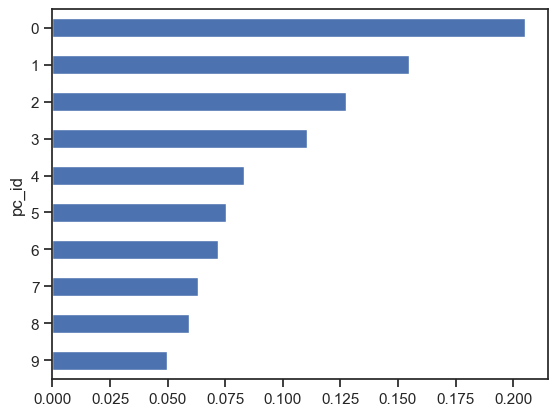

In [34]:
COMPINF.exp_var.sort_values().plot.barh();

In [35]:
DOC = pd.DataFrame(index=TFIDF.index).join(LIB)
DOC

title                        part  \
book_id chap_num                                                      
1       1         The Lord of the Rings  The Fellowship of the Ring   
        2         The Lord of the Rings  The Fellowship of the Ring   
        3         The Lord of the Rings  The Fellowship of the Ring   
        4         The Lord of the Rings  The Fellowship of the Ring   
        5         The Lord of the Rings  The Fellowship of the Ring   
...                                 ...                         ...   
6       5         The Lord of the Rings      The Return of the King   
        6         The Lord of the Rings      The Return of the King   
        7         The Lord of the Rings      The Return of the King   
        8         The Lord of the Rings      The Return of the King   
        9         The Lord of the Rings      The Return of the King   

                            author  year_of_publish  
book_id chap_num                                     
1       1         J. R. R. Tolkien  21 October 1954  
        2         J. R. R. Tolkien  21 October 1954  
        3         J. R. R. Tolkien  21 October 1954  
        4         J. R. R. Tolkien  21 October 1954  
        5         J. R. R. Tolkien  21 October 1954  
...                            ...              ...  
6       5         J. R. R. Tolkien   5 January 1956  
        6         J. R. R. Tolkien   5 January 1956  
        7         J. R. R. Tolkien   5 January 1956  
        8         J. R. R. Tolkien   5 January 1956  
        9         J. R. R. Tolkien   5 January 1956  

[62 rows x 4 columns]

In [36]:
DOC['label'] = DOC.apply(lambda x: f"{x['author'].title()} Book {x.name[0]} Ch{x.name[1]}", axis=1)

In [37]:
DOC

title                        part  \
book_id chap_num                                                      
1       1         The Lord of the Rings  The Fellowship of the Ring   
        2         The Lord of the Rings  The Fellowship of the Ring   
        3         The Lord of the Rings  The Fellowship of the Ring   
        4         The Lord of the Rings  The Fellowship of the Ring   
        5         The Lord of the Rings  The Fellowship of the Ring   
...                                 ...                         ...   
6       5         The Lord of the Rings      The Return of the King   
        6         The Lord of the Rings      The Return of the King   
        7         The Lord of the Rings      The Return of the King   
        8         The Lord of the Rings      The Return of the King   
        9         The Lord of the Rings      The Return of the King   

                            author  year_of_publish  \
book_id chap_num                                      
1       1         J. R. R. Tolkien  21 October 1954   
        2         J. R. R. Tolkien  21 October 1954   
        3         J. R. R. Tolkien  21 October 1954   
        4         J. R. R. Tolkien  21 October 1954   
        5         J. R. R. Tolkien  21 October 1954   
...                            ...              ...   
6       5         J. R. R. Tolkien   5 January 1956   
        6         J. R. R. Tolkien   5 January 1956   
        7         J. R. R. Tolkien   5 January 1956   
        8         J. R. R. Tolkien   5 January 1956   
        9         J. R. R. Tolkien   5 January 1956   

                                        label  
book_id chap_num                               
1       1         J. R. R. Tolkien Book 1 Ch1  
        2         J. R. R. Tolkien Book 1 Ch2  
        3         J. R. R. Tolkien Book 1 Ch3  
        4         J. R. R. Tolkien Book 1 Ch4  
        5         J. R. R. Tolkien Book 1 Ch5  
...                                       ...  
6       5         J. R. R. Tolkien Book 6 Ch5  
        6         J. R. R. Tolkien Book 6 Ch6  
        7         J. R. R. Tolkien Book 6 Ch7  
        8         J. R. R. Tolkien Book 6 Ch8  
        9         J. R. R. Tolkien Book 6 Ch9  

[62 rows x 5 columns]

In [38]:
LOADINGS

pc_id,0,1,2,3,4,5,6,7,8,9
term_str,,,,,,,,,,
fine,-0.000871,0.021445,-0.000992,0.012126,-0.034304,-0.003272,0.023794,0.007429,0.001328,-0.018542
worn,-0.002824,-0.003368,-0.004184,-0.006212,-0.001990,0.017796,-0.000446,0.006806,-0.027300,0.020346
nice,-0.114280,-0.043761,-0.056330,-0.005842,0.004798,-0.016233,0.025119,-0.021434,0.019676,-0.041185
remote,-0.014837,-0.005453,-0.006187,-0.011442,0.002521,0.007002,-0.002147,-0.004331,0.005519,0.008619
horror,-0.003215,-0.012623,-0.005798,-0.002922,0.013686,-0.000637,-0.017492,0.024005,-0.023253,0.043743
...,...,...,...,...,...,...,...,...,...,...
steward,0.014684,-0.079191,0.107231,0.062996,-0.025954,-0.009596,0.001103,-0.006118,-0.027623,-0.006282
vague,-0.000154,0.027139,0.004622,0.000873,-0.002808,0.020039,-0.018654,-0.009609,-0.013303,-0.008750
cloth,0.008587,0.007834,0.011190,0.011687,0.001532,-0.013081,0.024464,-0.003452,-0.030090,0.001232


In [39]:
VOCAB

,Unnamed: 0,n,p,i,dfidf,porter_stem,max_pos,max_pos_group,stop
term_str,,,,,,,,,
fine,3781,39,0.000082,13.570367,32.904590,fine,NN,NN,0
worn,12272,28,0.000059,14.048414,32.904590,worn,NN,NN,0
nice,7022,90,0.000190,12.363916,32.904590,nice,JJ,JJ,0
remote,8514,29,0.000061,13.997788,32.904590,remot,NN,NN,0
horror,5261,36,0.000076,13.685844,32.904590,horror,NN,NN,0
...,...,...,...,...,...,...,...,...,...
steward,10119,34,0.000072,13.768306,26.322682,steward,NN,NN,0
vague,11623,12,0.000025,15.270806,26.322682,vagu,NN,NN,0
cloth,1833,17,0.000036,14.768306,26.322682,cloth,NN,NN,0


In [49]:
VOCAB.to_csv('VOCAB_PCA.csv', index=True)
LOADINGS.to_csv('LOADINGS_PCA.csv', index=True)
DOC.to_csv('DOC_PCA.csv', index=True)

In [41]:
#px.scatter(LOADINGS.join(VOCAB).reset_index(), 0, 1, hover_name='term_str', color='dfidf',
#           marginal_x='box', marginal_y='box', height=1000)

In [44]:
top_5_positive_PC1 = LOADINGS.nlargest(5, 0).index.tolist()
top_5_negative_PC1 = LOADINGS.nsmallest(5, 0).index.tolist()
top_5_positive_PC2 = LOADINGS.nlargest(5, 1).index.tolist()
top_5_negative_PC2 = LOADINGS.nsmallest(5, 1).index.tolist()

In [45]:
print("Top 5 Positive Terms for PC1:", top_5_positive_PC1)
print("Top 5 Negative Terms for PC1:", top_5_negative_PC1)
print("Top 5 Positive Terms for PC2:", top_5_positive_PC2)
print("Top 5 Negative Terms for PC2:", top_5_negative_PC2)

Top 5 Positive Terms for PC1: ['théoden', 'éomer', 'gimli', 'saruman', 'isengard']
Top 5 Negative Terms for PC1: ['gollum', 'faramir', 'precious', 'nice', 'ã']
Top 5 Positive Terms for PC2: ['strider', 'bilbo', 'bag', 'pony', 'buckland']
Top 5 Negative Terms for PC2: ['faramir', 'gollum', 'éomer', 'théoden', 'denethor']


In [46]:
DOC

title                        part  \
book_id chap_num                                                      
1       1         The Lord of the Rings  The Fellowship of the Ring   
        2         The Lord of the Rings  The Fellowship of the Ring   
        3         The Lord of the Rings  The Fellowship of the Ring   
        4         The Lord of the Rings  The Fellowship of the Ring   
        5         The Lord of the Rings  The Fellowship of the Ring   
...                                 ...                         ...   
6       5         The Lord of the Rings      The Return of the King   
        6         The Lord of the Rings      The Return of the King   
        7         The Lord of the Rings      The Return of the King   
        8         The Lord of the Rings      The Return of the King   
        9         The Lord of the Rings      The Return of the King   

                            author  year_of_publish  \
book_id chap_num                                      
1       1         J. R. R. Tolkien  21 October 1954   
        2         J. R. R. Tolkien  21 October 1954   
        3         J. R. R. Tolkien  21 October 1954   
        4         J. R. R. Tolkien  21 October 1954   
        5         J. R. R. Tolkien  21 October 1954   
...                            ...              ...   
6       5         J. R. R. Tolkien   5 January 1956   
        6         J. R. R. Tolkien   5 January 1956   
        7         J. R. R. Tolkien   5 January 1956   
        8         J. R. R. Tolkien   5 January 1956   
        9         J. R. R. Tolkien   5 January 1956   

                                        label  
book_id chap_num                               
1       1         J. R. R. Tolkien Book 1 Ch1  
        2         J. R. R. Tolkien Book 1 Ch2  
        3         J. R. R. Tolkien Book 1 Ch3  
        4         J. R. R. Tolkien Book 1 Ch4  
        5         J. R. R. Tolkien Book 1 Ch5  
...                                       ...  
6       5         J. R. R. Tolkien Book 6 Ch5  
        6         J. R. R. Tolkien Book 6 Ch6  
        7         J. R. R. Tolkien Book 6 Ch7  
        8         J. R. R. Tolkien Book 6 Ch8  
        9         J. R. R. Tolkien Book 6 Ch9  

[62 rows x 5 columns]

In [47]:
import plotly.express as px

# Ensure the document metadata is correctly merged with DCM for coloring
DOC['PC0'] = DCM[0]
DOC['PC1'] = DCM[1]
DOC['PC2'] = DCM[2]
DOC['PC3'] = DCM[3]

# Visualization 1: First two principal components
fig_docs_1 = px.scatter(DOC, x='PC0', y='PC1', color='part',
                        labels={"PC0": "Principal Component 0", "PC1": "Principal Component 1"},
                        title="Document Scatterplot on PC0 and PC1")
fig_loadings_1 = px.scatter(LOADINGS, x=0, y=1,
                            labels={0: "PC0 Loadings", 1: "PC1 Loadings"},
                            title="Loadings Plot for PC0 and PC1")

# Visualization 2: Second and third principal components
fig_docs_2 = px.scatter(DOC, x='PC1', y='PC2', color='part',
                        labels={"PC1": "Principal Component 1", "PC2": "Principal Component 2"},
                        title="Document Scatterplot on PC1 and PC2")
fig_loadings_2 = px.scatter(LOADINGS, x=1, y=2,
                            labels={1: "PC1 Loadings", 2: "PC2 Loadings"},
                            title="Loadings Plot for PC1 and PC2")

# Display the figures
fig_docs_1.show()
fig_loadings_1.show()
fig_docs_2.show()
fig_loadings_2.show()

In [50]:
LIB

,title,part,author,year_of_publish
book_id,,,,
1,The Lord of the Rings,The Fellowship of the Ring,J. R. R. Tolkien,21 October 1954
2,The Lord of the Rings,The Fellowship of the Ring,J. R. R. Tolkien,21 October 1954
3,The Lord of the Rings,The Two Towers,J. R. R. Tolkien,21 April 1955
4,The Lord of the Rings,The Two Towers,J. R. R. Tolkien,21 April 1955
5,The Lord of the Rings,The Return of the King,J. R. R. Tolkien,5 January 1956
6,The Lord of the Rings,The Return of the King,J. R. R. Tolkien,5 January 1956
